<a href="https://colab.research.google.com/github/vsolodkyi/NeuralNetworks_SkillBox/blob/main/module_16/hw_16_taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#download libraries

import numpy as np

import gym

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#create taxi simulator
env = gym.make('Taxi-v3')

NUM_STATES = env.observation_space.n
NUM_ACTIONS = env.action_space.n

print('States: {}'.format(NUM_STATES))
print('Actions: {}'.format(NUM_ACTIONS))
print('Actions kind: {}'.format(env.action_space))

States: 500
Actions: 6
Actions kind: Discrete(6)


In [18]:
lr = 0.8 # learning rate
gamma = 0.95 # параметр дисконтирования

NUM_EPISODES = 5000 # число эпизодов для обучения
MAX_STEPS = 100 # максимальное число шагов в эпизоде

In [19]:
pathLenList = [] # длины траекторий по эпизодам
totalRewardList = [] # суммарные награды по эпизодам

# Инициализация Q-функции (таблицы)
Q = np.random.rand(NUM_STATES, NUM_ACTIONS)

for i in range(NUM_EPISODES):
    
    s = env.reset()

    totalReward = 0
    step = 0

    while step < MAX_STEPS:
        step += 1
            
        # Выбор действия по текущей политике
        a = np.argmax(Q[s,:])
        
        # Сделать шаг
        s1, r, done, _ = env.step(a)
        
        # Новое (целевое) значение Q-функции
        if done:
            Q_target = r
        else:
            Q_target = r + gamma * np.max(Q[s1,:])
            
        # Обновление Q-функции
        Q[s,a] = (1-lr) * Q[s,a] + lr * Q_target
        
        totalReward += r
        s = s1
        
        # Если конец эпизода
        if done:
            break
            
    pathLenList.append(step)
    totalRewardList.append(totalReward)
    if i % 100 == 0:
      print('Episode {}: Total reward = {}'.format(i, totalReward))        

Episode 0: Total reward = -316
Episode 100: Total reward = -70
Episode 200: Total reward = 11
Episode 300: Total reward = 7
Episode 400: Total reward = -6
Episode 500: Total reward = 11
Episode 600: Total reward = 6
Episode 700: Total reward = 6
Episode 800: Total reward = 8
Episode 900: Total reward = 10
Episode 1000: Total reward = 6
Episode 1100: Total reward = 7
Episode 1200: Total reward = 4
Episode 1300: Total reward = 8
Episode 1400: Total reward = 5
Episode 1500: Total reward = 5
Episode 1600: Total reward = 7
Episode 1700: Total reward = 6
Episode 1800: Total reward = 11
Episode 1900: Total reward = 6
Episode 2000: Total reward = 8
Episode 2100: Total reward = 6
Episode 2200: Total reward = 6
Episode 2300: Total reward = 9
Episode 2400: Total reward = 6
Episode 2500: Total reward = 6
Episode 2600: Total reward = 9
Episode 2700: Total reward = 5
Episode 2800: Total reward = 9
Episode 2900: Total reward = 4
Episode 3000: Total reward = 11
Episode 3100: Total reward = 9
Episode 3

In [20]:
print(Q)

[[ 0.78428182  0.87374006  0.8185034   0.80662921  0.57775759  0.80777416]
 [-5.97750319 -5.64855843 -5.53992639 -5.82847839  5.20997639 -7.56186705]
 [-3.3387779  -3.52282821 -3.35437822 -3.07082966 10.9512375  -7.32670259]
 ...
 [-1.38875783 -1.25441799 -1.43877917 -2.08686263 -7.6293256  -7.55853725]
 [-4.01964316 -4.13725745 -3.95863919 -4.30299486 -7.82788175 -7.71109559]
 [-0.39477872  0.32123939  0.27883023 16.67743016 -7.63497142  0.0409021 ]]


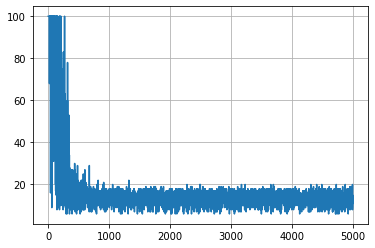

In [21]:
plt.plot(pathLenList)
plt.grid()

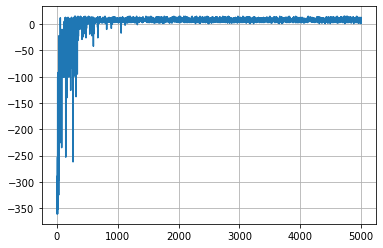

In [22]:
plt.plot(totalRewardList)
plt.grid()

In [23]:
totalReward = 0
s = env.reset()

for _ in range(1000):
    env.render()
    a = np.argmax(Q[s,:]) # выбираем оптимальное действие
    s, r, done, _ = env.step(a)
    totalReward += r
    if done:
        env.render()        
        break

env.close()
print('Total reward = {}'.format(totalReward))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R:_| : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| :_| : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : |_: : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : | :_: |
| : : : : |
| | : | : |
|Y| : |B: |